<a href="https://colab.research.google.com/github/Kishor8600/Netflix_shows_analysis/blob/main/Netflix_shows_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kishordsonawane","key":"f7fe9fa908c0347e60f942061489fb1a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d shivamb/netflix-shows
!unzip netflix-shows.zip

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


### **⬇️ Load the Netflix Dataset**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Display first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Basic Data Cleaning operations**

In [ ]:
# Check for missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Drop rows with too many missing values if needed
df.dropna(subset=['date_added', 'rating'], inplace=True)

# Strip whitespace from 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Now convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Create a new column for release year
df['year_added'] = df['date_added'].dt.year

# Show updated dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8793 non-null   object        
 1   type          8793 non-null   object        
 2   title         8793 non-null   object        
 3   director      6172 non-null   object        
 4   cast          7968 non-null   object        
 5   country       7964 non-null   object        
 6   date_added    8793 non-null   datetime64[ns]
 7   release_year  8793 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8793 non-null   object        
 11  description   8793 non-null   object        
 12  year_added    8793 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 927.4+ KB


### Perfrom EDA

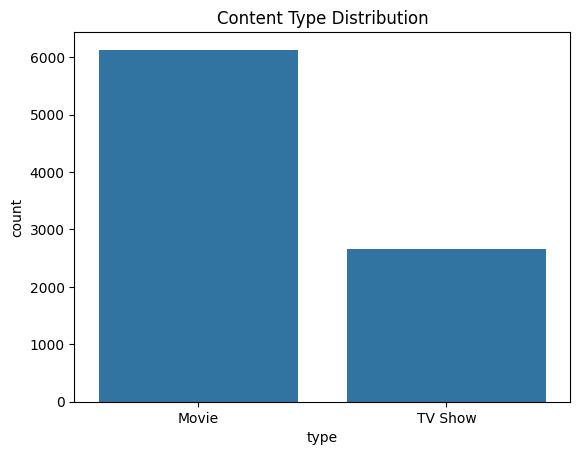

In [ ]:
#Content type distibution (Movies Vs TV shows)

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()

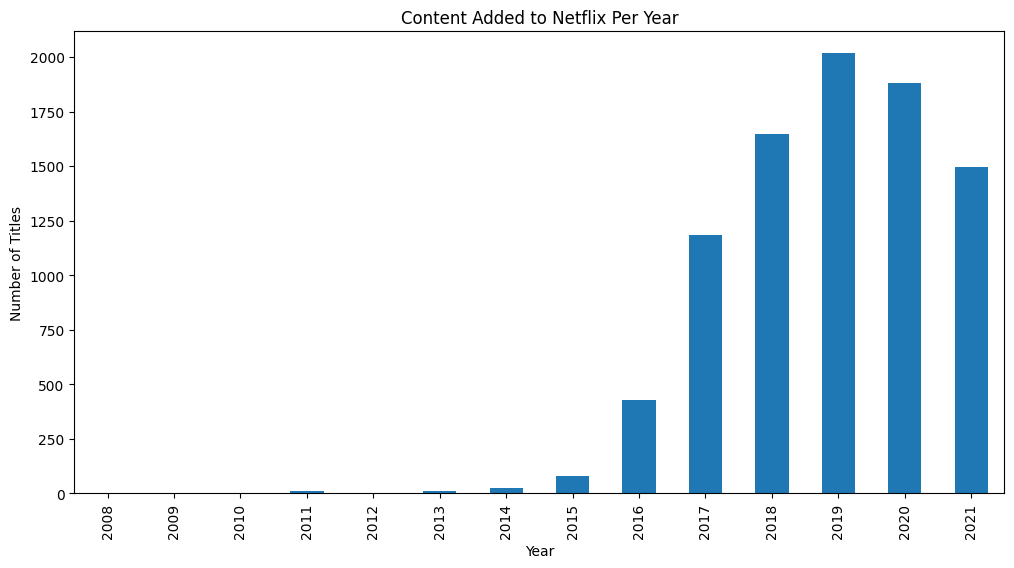

In [ ]:
# Content Added per year

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Content Added to Netflix Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

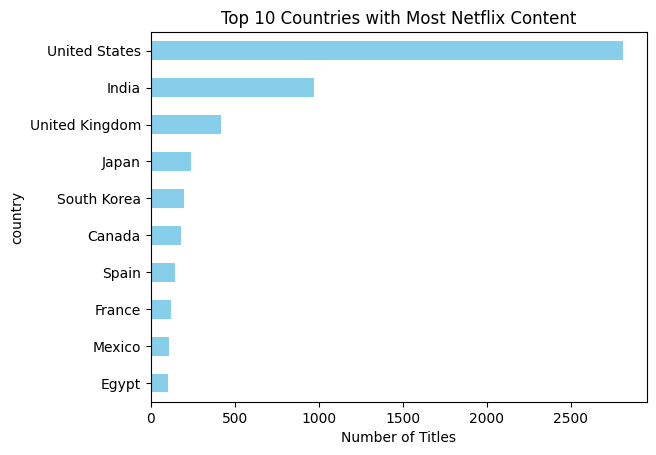

In [ ]:
# Top 10 countries producing Netflix content

df['country'].dropna(inplace=True)
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

### **Genre(Category) Analysis**

<ipython-input-16-223aef330446>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


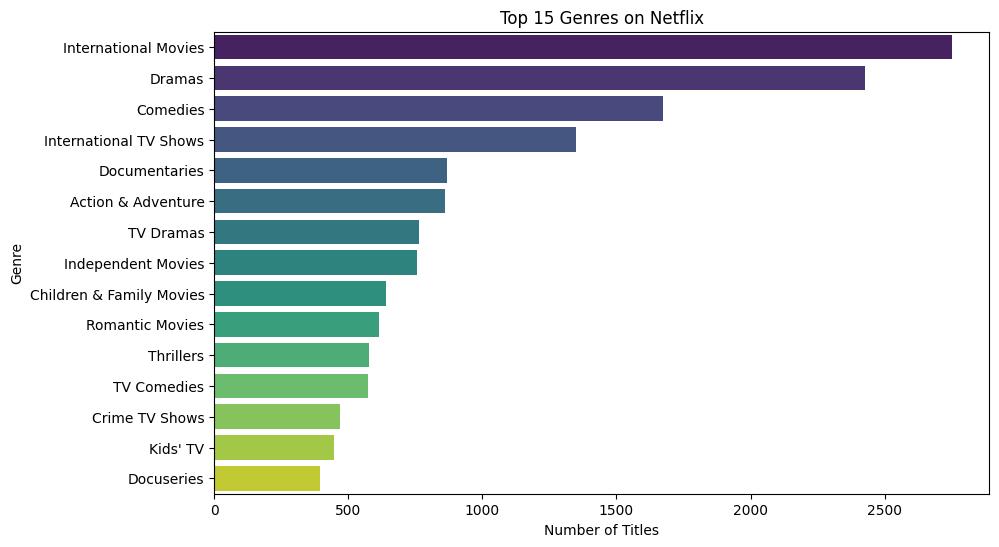

In [ ]:
# Create a new DataFrame with exploded genres
genre_data = df[['title', 'listed_in']].dropna()
genre_data['genre'] = genre_data['listed_in'].str.split(', ')
genre_data = genre_data.explode('genre')

# Count genre frequency
genre_counts = genre_data['genre'].value_counts().head(15)

# Plot top 15 genres
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

### **Word Cloud of Netflix Titles or Genres**

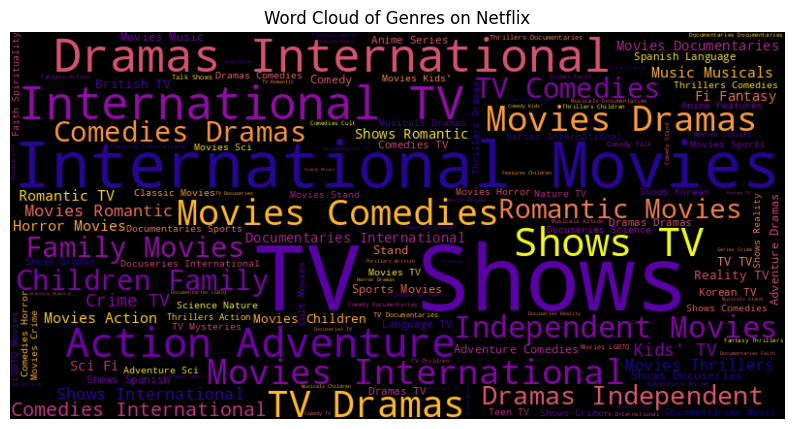

In [ ]:
from wordcloud import WordCloud

# Combine all genres into one string
all_genres = ' '.join(genre_data['genre'])

# Create Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(all_genres)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres on Netflix')
plt.show()

### **🤖 Simple Content Recommendation System**:

In [ ]:
# Drop missing descriptions
df = df.dropna(subset=['description'])

# Reset index just in case
df = df.reset_index(drop=True)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer (remove common words)
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the descriptions
tfidf_matrix = tfidf.fit_transform(df['description'])

from sklearn.metrics.pairwise import linear_kernel

# Cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Map titles to index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Recommend function
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices.get(title)
    if idx is None:
        return ["Title not found."]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 excluding itself

    show_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[show_indices]


In [ ]:
get_recommendations("Narcos")

,title
7452,Miss Dynamite
6670,El Cartel 2
2921,Narcos: Mexico
4750,El Chapo
310,Cocaine Cowboys: The Kings of Miami


In [ ]:
get_recommendations("Kota Factory")

,title
2272,Drishyam
266,The Creative Indians
2091,The Bridge Curse
4076,She's Dating the Gangster
805,Racket Boys


In [ ]:
get_recommendations("Drishyam")

,title
1194,Catch.er
1281,Red
7791,Punjab 1984
8638,Ugly
35,The Father Who Moves Mountains
